In [1]:
import numpy as np

# Import Qiskit
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi

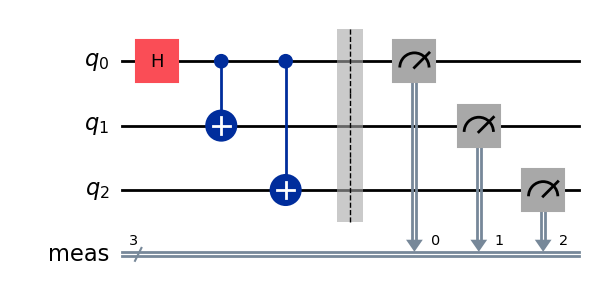

In [2]:
from qiskit import QuantumCircuit
from qiskit import transpile
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime import SamplerV2
from qiskit_ibm_runtime.fake_provider import FakeManilaV2
 
# Get a fake backend from the fake provider
backend = FakeManilaV2()
 
# Create a simple circuit
circuit = QuantumCircuit(3)
circuit.h(0)
circuit.cx(0,1)
circuit.cx(0,2)
circuit.measure_all()
circuit.draw('mpl', style="iqp")


Instruction(name='h', num_qubits=1, num_clbits=0, params=[])
Instruction(name='cx', num_qubits=2, num_clbits=0, params=[])
Instruction(name='qpd_1q', num_qubits=1, num_clbits=0, params=[])
[CircuitInstruction(operation=Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(3, 'q'), 0),), clbits=()), CircuitInstruction(operation=Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(3, 'q'), 0), Qubit(QuantumRegister(3, 'q'), 1)), clbits=())]
<class 'qiskit.circuit.quantumcircuit.QuantumCircuit'>
<class 'qiskit.circuit.quantumcircuit.QuantumCircuit'>


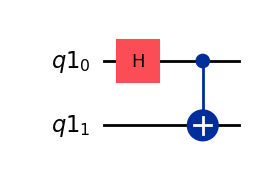

In [8]:
from qiskit_addon_cutting import (
    cut_gates,
    partition_problem,
    generate_cutting_experiments,
    reconstruct_expectation_values,
)
from qiskit.circuit.instruction import *
circuit.remove_final_measurements()
for instr in circuit.data:
    if (instr.name == "qpd_1q"):
        print(instr)


partitioned_problem = partition_problem(
    circuit=circuit, partition_labels= "AAB", observables= None
)
subcircuits = partitioned_problem.subcircuits
subcircuits['A'].draw("mpl")
circuitA = subcircuits['A']
for instr in circuitA.data:
    print(instr.operation)
circuitA.data = [hasverify for hasverify in circuitA.data if hasverify.operation.name != 'qpd_1q']
print(circuitA.data)
print(type(circuitA))
print(type(circuit))
circuitA.draw("mpl")


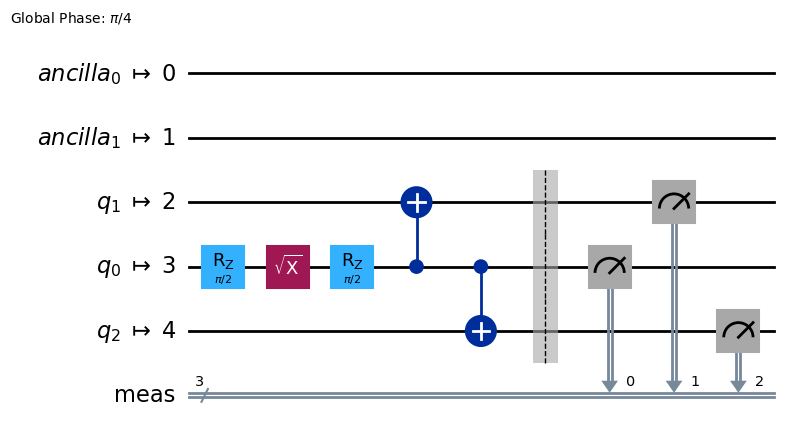

In [ ]:
# Transpile the ideal circuit to a circuit that can be
# directly executed by the backend
transpiled_circuit = transpile(circuit, backend)
transpiled_circuit.draw('mpl', style="iqp")

In [ ]:
# Run the transpiled circuit using the simulated fake backend
sampler = SamplerV2(backend)
job = sampler.run([transpiled_circuit])
pub_result = job.result()[0]
counts1 = pub_result.data.meas.get_counts()
plot_histogram(counts1)
print(counts1)

{'111': 423, '010': 35, '000': 483, '001': 6, '100': 5, '110': 12, '101': 45, '011': 15}


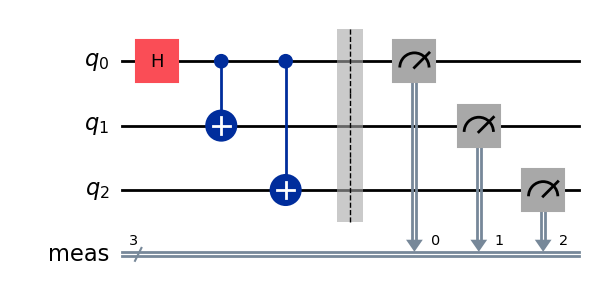

In [ ]:
simulator = AerSimulator()
transpiled_circuit_ideal = transpile(circuit, simulator)
transpiled_circuit_ideal.draw('mpl', style="iqp")

{'111': 510, '000': 514}


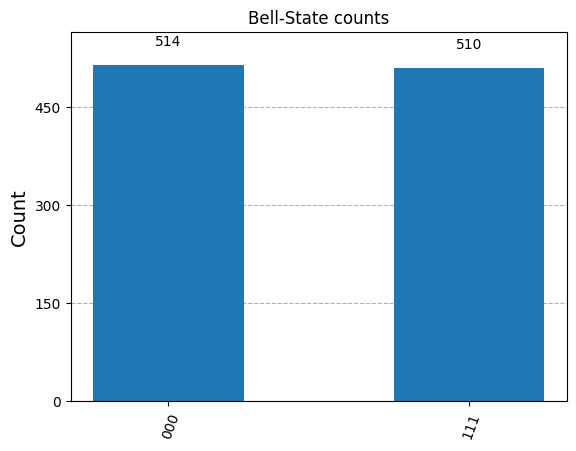

In [ ]:
# Run and get counts
result = simulator.run(circuit).result()
counts2 = result.get_counts(circuit)
print(counts2)
plot_histogram(counts2, title='Bell-State counts')

In [ ]:
import qiskit
from qiskit_aer.primitives import SamplerV2

# Generate 3-qubit GHZ state
circ = qiskit.QuantumCircuit(3)
circ.h(0)
circ.cx(0, 1)
circ.cx(1, 2)
circ.measure_all()

# Construct an ideal simulator with SamplerV2
sampler = SamplerV2()
job = sampler.run([circ], shots=128)

# Perform an ideal simulation
result_ideal = job.result()
counts_ideal = result_ideal[0].data.meas.get_counts()
print('Counts(ideal):', counts_ideal)

Counts(ideal): {'000': 63, '111': 65}


In [4]:
import numpy as np
 
from qiskit.circuit import QuantumCircuit, Parameter
from qiskit.transpiler import PassManager
 
from qiskit_ibm_runtime.transpiler.passes import ConvertISAToClifford
 
# An ISA circuit ending with a Z rotation by pi/3
qc = QuantumCircuit(2, 2)
qc.sx(0)
qc.rz(np.pi/2, 0)
qc.sx(0)
qc.barrier()
qc.cx(0, 1)
qc.rz(np.pi/3, 0)  # non-Clifford Z rotation
qc.rz(Parameter("th"), 0)  # Z rotation with unspecified angle
 
# Turn into a Clifford circuit
pm = PassManager([ConvertISAToClifford()])
clifford_qc = pm.run(qc)
